In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
train_data = pd.read_csv('./data/data/train.csv')
test_data = pd.read_csv('./data/data/test.csv')

C:\Users\tuman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [314]:
train_data['region'].values

array(['Пермский край', 'Московская область', 'Ярославская область', ...,
       'Калининградская область', 'Кемеровская область',
       'Кировская область'], dtype=object)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279792 entries, 0 to 279791
Data columns (total 77 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   city                                 279792 non-null  object 
 1   floor                                103555 non-null  object 
 2   id                                   279792 non-null  object 
 3   lat                                  279792 non-null  float64
 4   lng                                  279792 non-null  float64
 5   osm_amenity_points_in_0.001          279792 non-null  int64  
 6   osm_amenity_points_in_0.005          279792 non-null  int64  
 7   osm_amenity_points_in_0.0075         279792 non-null  int64  
 8   osm_amenity_points_in_0.01           279792 non-null  int64  
 9   osm_building_points_in_0.001         279792 non-null  int64  
 10  osm_building_points_in_0.005         279792 non-null  int64  
 11  osm_building_

In [5]:
train_nulls = train_data.isnull().sum().sort_values(ascending=False)
test_nulls = test_data.isnull().sum().sort_values(ascending=False)

In [6]:
train_null_cols = train_nulls[train_nulls > 0]
test_null_cols = test_nulls[test_nulls > 0]

In [50]:
test_null_cols.index

Index(['floor', 'reform_mean_floor_count_500', 'reform_mean_year_building_500',
       'reform_house_population_500', 'reform_house_population_1000',
       'reform_mean_year_building_1000', 'reform_mean_floor_count_1000',
       'street'],
      dtype='object')

In [51]:
train_null_cols

floor                             176237
reform_mean_floor_count_500        30168
reform_mean_year_building_500      29637
reform_house_population_500        27234
reform_mean_floor_count_1000       16708
reform_mean_year_building_1000     16239
reform_house_population_1000       14596
street                              1606
osm_city_nearest_population           55
dtype: int64

In [7]:
unique_train_null_col = set(train_null_cols.index) - set(test_null_cols.index)

<AxesSubplot:>

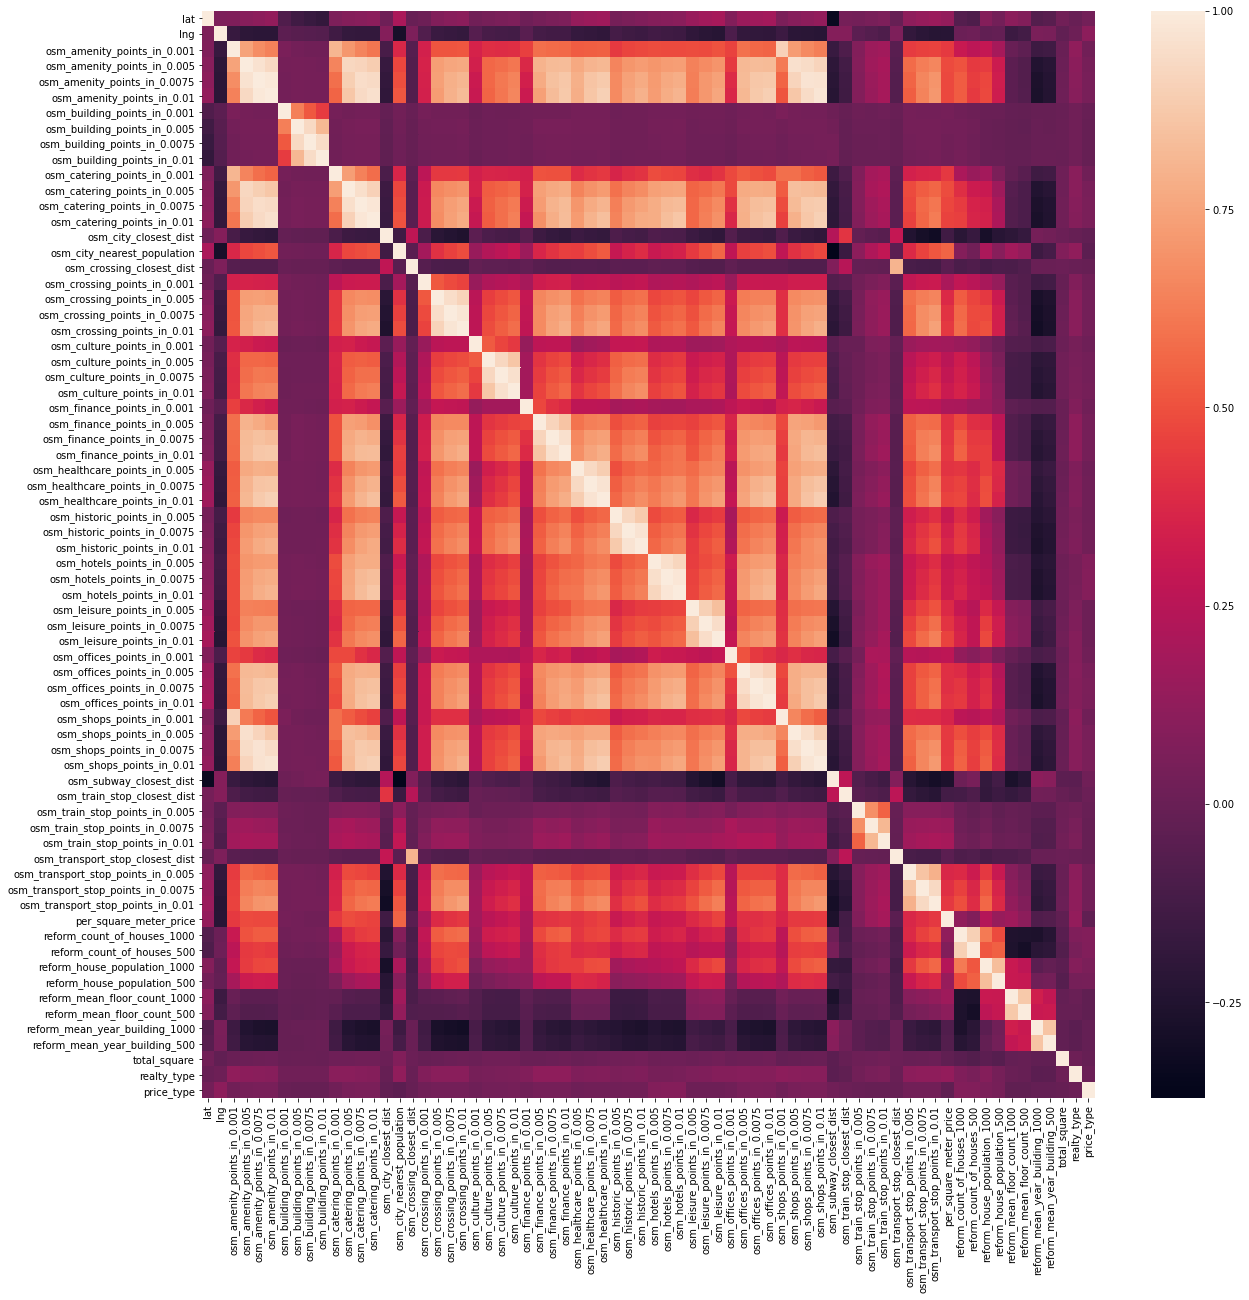

In [45]:
plt.figure(figsize=(20, 20))
sns.heatmap(train_data.corr())

In [12]:
train_data.describe()

,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,total_square,realty_type,price_type
count,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,2.797370e+05,279792.000000,279792.000000,279792.000000,279792.000000,279792.00000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,279792.000000,2.797920e+05,279792.000000,279792.000000,265196.000000,252558.000000,263084.000000,249624.000000,263553.000000,250155.000000,279792.000000,279792.000000,279792.000000
mean,54.364078,47.763540,2.709084,40.605146,81.596171,133.285458,0.037442,0.885701,2.046467,3.748163,0.614414,8.810970,17.408561,28.341454,15.516565,2.584430e+06,0.519421,0.737344,14.097683,29.307475,48.71462,0.071857,1.487837,3.258067,5.555917,0.145883,2.050423,4.041327,6.442375,2.030673,4.152703,6.836268,1.681188,3.679873,6.225678,1.042767,2.143657,3.555641,2.022713,4.188147,7.047953,0.239188,3.109102,6.216915,10.217090,1.620772,22.637438,44.802353,72.466940,170.930940,9.604875,0.078637,0.196360,0.347601,0.575846,6.262863,12.951189,21.618520,1.101955e+05,100.453691,30.110661,2042.541716,644.610557,7.051233,7.360464,1967.532599,1967.988580,507.833604,54.974088,0.016058
std,4.245713,17.044625,4.202451,53.293388,105.193169,172.290136,0.391014,6.858338,14.801566,25.679859,1.695269,17.713251,33.267316,53.790038,34.755675,4.110835e+06,4.011926,1.386548,15.136481,30.232170,49.24749,0.372920,4.407199,8.815882,13.994591,0.457838,3.371304,6.111080,9.351825,3.331527,6.429165,10.338075,3.908801,7.823028,12.736713,3.312283,6.422509,10.342464,3.042804,5.686815,9.094224,0.737926,5.517670,10.720621,17.458145,2.65

<AxesSubplot:xlabel='osm_building_points_in_0.001'>

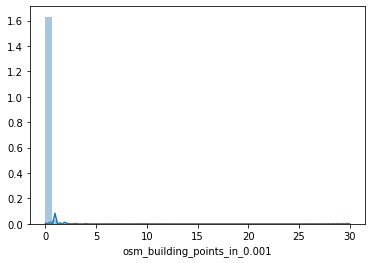

In [13]:
sns.distplot(train_data['osm_building_points_in_0.001'])

In [307]:
train_data[train_data['city'].apply(lambda x: 'Люберцы' in x)]['city'].unique()

array(['Люберцы', 'Люберцы городской округ, Красково дп, пос. Коренево',
       'Люберцы городской округ, Томилино рп',
       'Люберцы городской округ, Октябрьский рп',
       'Люберцы городской округ, Малаховка рп, Малаховского Экспериментального Завода мкр',
       'Люберцы городской округ, пос. Егорово, Томилино ЖК',
       'Люберцы городской округ, д. Марусино',
       'Люберцы городской округ, Красково дп',
       'Люберцы городской округ, Октябрьский рп, Западный мкр',
       'Люберцы городской округ, пос. Мирный',
       'Люберцы городской округ, Томилино рп, Экопарк мкр',
       'Люберцы городской округ, Малаховка рп',
       'Люберцы городской округ, Красково пгт',
       'Люберцы городской округ, Томилино рп, Птицефабрика мкр',
       'Люберцы городской округ, пос. Чкалово',
       'Люберцы городской округ, пос. Жилино-1',
       'Люберцы городской округ, пос. Мирный, Томилино Парк ЖК',
       'Люберцы городской округ, д. Мотяково',
       'Люберцы городской округ, д. Машков

In [302]:
train_data['city'].value_counts().head(100)

Москва               55996
Санкт-Петербург      18906
Краснодар            13009
Екатеринбург          8580
Новосибирск           6753
Челябинск             6201
Самара                6147
Казань                6033
Тюмень                5861
Уфа                   4931
Нижний Новгород       4904
Ростов-на-Дону        4645
Пермь                 3855
Красноярск            3849
Воронеж               3635
Саратов               3026
Ставрополь            2726
Калининград           2600
Иркутск               2501
Волгоград             2401
Сочи                  2350
Омск                  2187
Ижевск                2047
Барнаул               2031
Киров                 1693
Кемерово              1679
Ярославль             1580
Ульяновск             1543
Белгород              1540
Тольятти              1488
Пенза                 1396
Тула                  1358
Новороссийск          1331
Анапа                 1276
Иваново               1213
Сургут                1206
Брянск                1183
Л

In [11]:
train_data[train_data['street'] == 'S12711']

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
19,Фокино,NaN,COL_19,53.451530,34.411484,0,2,3,4,0,0,1,1,0,1,1,1,23.452164,Брянск,406553.0,4.574760,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,307.376228,18.867675,0,0,0,4.557347,0,0,0,14770.833333,99,38,391.0,179.0,2.163265,2.184211,1955.408163,1957.157895,Брянская область,192.000000,S12711,2020-01-05,110,0
79,Саранск,NaN,COL_81,54.192783,45.188725,4,69,117,176,0,0,1,1,0,11,20,29,0.746851,Саранск,302285.0,0.027726,1,18,41,65,0,1,2,2,0,6,9,18,0,0,2,1,2,5,2,2,2,1,2,4,1,4,9,16,4,48,84,122,243.705948,1.594877,0,0,0,0.024349,7,13,17,109571.428571,109,52,1541.0,613.0,4.981481,4.019231,1966.814815,1961.423077,Мордовия,84.000000,S12711,2020-01-05,110,0
88,Новотитаровская,NaN,COL_90,45.241352,38.992607,0,1,19,29,0,2,6,11,0,0,3,5,22.958846,Краснодар,1405000.0,0.476917,0,0,3,4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,14,20,340.621904,19.859474,0,0,0,0.320263,2,5,9,119400.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Краснодарский край,100.000000,S12711,2020-01-05,10,0
208,муниципальное образование Тула,NaN,COL_213,54.264202,37.486140,0,4,4,9,0,0,0,0,0,0,0,0,11.647285,Тула,479105.0,1.726766,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,3,3,6,141.713996,9.317350,0,0,0,0.182723,3,3,3,34826.666667,46,41,349.0,225.0,2.600000,2.375000,1957.533333,1955.450000,Тульская область,300.000000,S12711,2020-01-05,110,0
267,Михайловск,NaN,COL_273,45.138214,42.016636,1,9,15,21,0,0,0,0,0,0,0,0,11.195372,Ставрополь,425853.0,0.023312,3,9,16,19,0,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,8,13,17,135.939650,3.446440,0,0,0,0.303349,1,5,6,47569.721116,39,29,722.0,564.0,5.270270,5.333333,1998.756757,1999.962963,Ставропольский край,100.400000,S12711,2020-01-05,110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279514,Курск,NaN,COL_262083,51.7413

In [8]:
train_data['street'].value_counts()

S12711    4991
S24233    2668
S20099    2249
S14617    1785
S9675     1446
S18486    1434
S15441    1384
S6089     1350
S10442    1328
S10922    1091
S27843    1042
S19208     994
S7108      987
S19729     978
S16774     897
S20527     853
S9256      797
S23601     786
S11347     785
S13992     779
S11307     717
S12321     708
S6671      701
S22536     685
S31918     683
S32158     653
S7194      607
S4713      586
S23629     570
S10892     566
S2681      563
S16773     544
S27481     538
S18724     529
S3821      509
S28736     509
S28997     500
S23356     486
S12785     485
S27169     476
S21803     474
S13735     462
S6517      461
S13286     460
S13411     459
S20324     454
S2108      452
S14290     450
S19616     449
S5904      442
S25158     442
S32174     442
S28481     435
S20430     433
S11135     432
S5311      429
S16738     421
S14730     416
S20761     412
S27968     404
S24016     398
S26195     394
S16793     391
S20312     389
S1850      385
S7748      384
S13395    

In [26]:
train_data['floor'].value_counts().head(50)

1.0       70393
2.0        7750
-1.0       7738
3.0        3516
1.0        2478
4.0        2194
5.0        1387
0.0         893
-2.0        762
6.0         673
7.0         671
1           442
2.0         352
8.0         340
-1.0        327
9.0         302
10.0        238
11.0        179
3.0         166
12.0        136
15.0        111
17.0         99
20.0         99
13.0         97
22.0         97
4.0          90
16.0         83
14.0         80
2            74
19.0         72
24.0         60
38.0         59
подвал       54
47.0         54
18.0         54
21.0         51
3            49
5.0          49
30.0         46
цоколь       41
0.0          40
53.0         40
-3.0         39
40.0         34
58.0         33
45.0         32
23.0         32
64.0         32
60.0         30
65.0         29
Name: floor, dtype: int64

<AxesSubplot:xlabel='per_square_meter_price'>

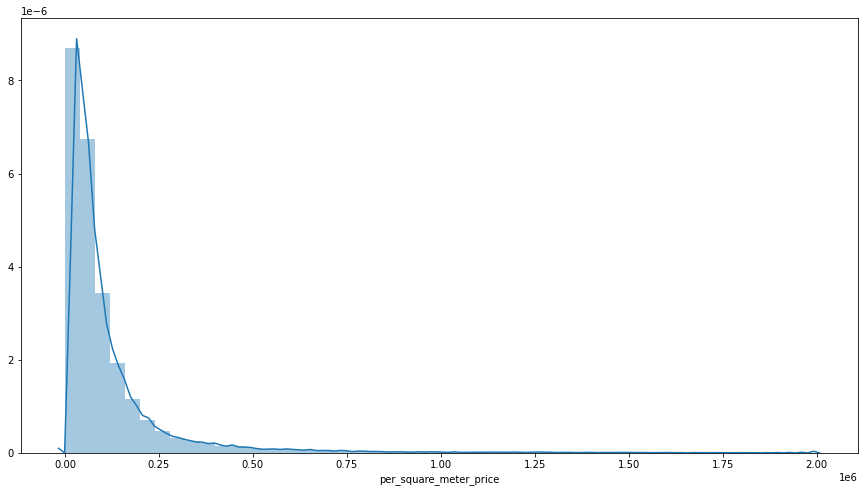

In [33]:
plt.figure(figsize=(15, 8))

sns.distplot(train_data[train_data['price_type'] == 0]['per_square_meter_price'])

<AxesSubplot:xlabel='per_square_meter_price'>

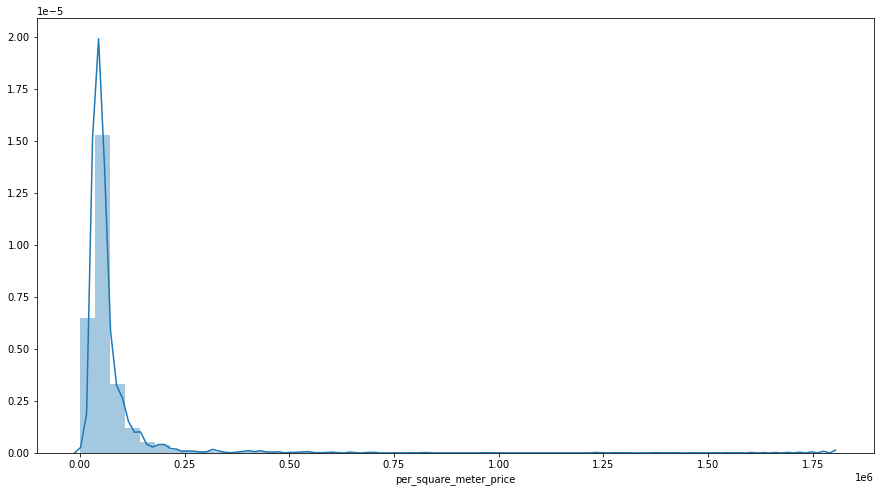

In [32]:
plt.figure(figsize=(15, 8))

sns.distplot(train_data[train_data['price_type'] == 1]['per_square_meter_price'])

In [38]:
train_data[train_data['price_type'] == 0]['per_square_meter_price'].describe()

count    2.752990e+05
mean     1.108652e+05
std      1.729917e+05
min      3.896104e+02
25%      2.938362e+04
50%      6.017279e+04
75%      1.194010e+05
max      1.990000e+06
Name: per_square_meter_price, dtype: float64

In [39]:
train_data[train_data['price_type'] == 1]['per_square_meter_price'].describe()

count    4.493000e+03
mean     6.915861e+04
std      8.941750e+04
min      1.095943e+03
25%      3.780809e+04
50%      4.975414e+04
75%      6.875507e+04
max      1.790993e+06
Name: per_square_meter_price, dtype: float64

In [43]:
train_data['price_type'].value_counts(normalize=True) * 100

0    98.394164
1     1.605836
Name: price_type, dtype: float64

In [41]:
test_data['price_type'].value_counts()

1    2974
Name: price_type, dtype: int64

<AxesSubplot:xlabel='price_type', ylabel='per_square_meter_price'>

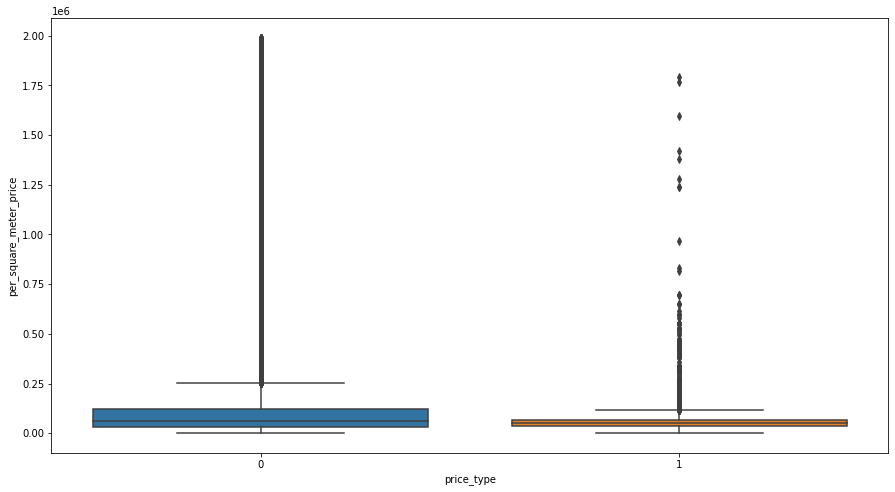

In [47]:
plt.figure(figsize=(15, 8))

sns.boxplot(train_data['price_type'], train_data['per_square_meter_price'])

<AxesSubplot:xlabel='osm_city_nearest_population'>

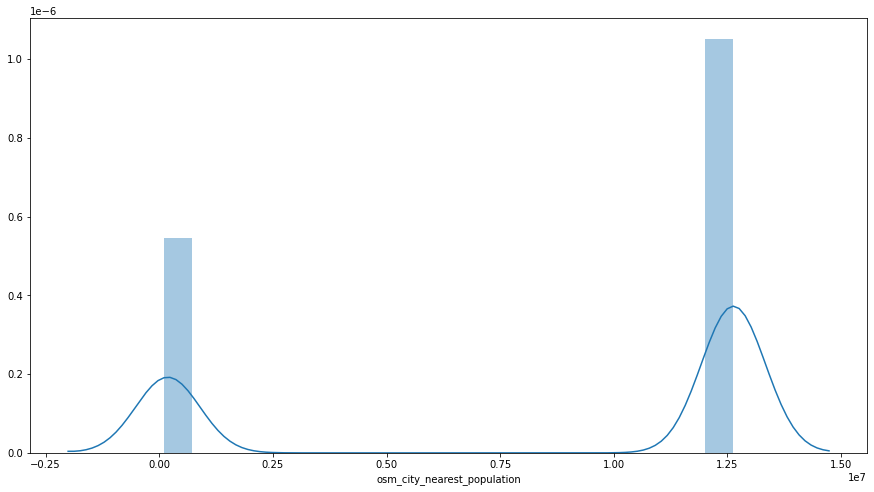

In [65]:
plt.figure(figsize=(15, 8))

sns.distplot(train_data[(~train_data['osm_city_nearest_population'].isnull()) & (train_data['city'] == 'Москва')]['osm_city_nearest_population'])

<AxesSubplot:xlabel='osm_city_nearest_population'>

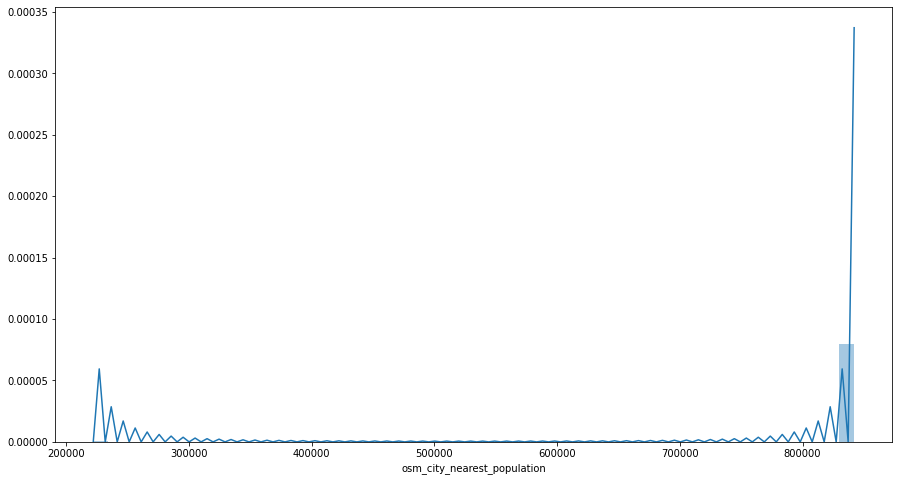

In [66]:
plt.figure(figsize=(15, 8))

sns.distplot(train_data[(~train_data['osm_city_nearest_population'].isnull()) & (train_data['city'] == 'Саратов')]['osm_city_nearest_population'])

In [68]:
train_data[(~train_data['osm_city_nearest_population'].isnull()) & (train_data['city'] == 'Саратов')]['osm_city_nearest_population'].unique()

array([842097., 221847.])

In [77]:
train_data[(~train_data['osm_city_nearest_population'].isnull()) & \
            (train_data['city'] == 'Саратов') & \
          (train_data['osm_city_nearest_population'] == 221847)]

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
6865,Саратов,NaN,COL_7006,51.583706,46.269928,0,0,0,0,0,0,0,0,0,0,0,0,13.665006,Энгельс,221847.0,5.378226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,344.602562,21.956372,0,0,0,5.093817,0,0,0,24875.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Саратовская область,1200.0,S22496,2020-01-12,10,0
28072,Саратов,NaN,COL_28729,51.788666,46.323280,0,0,0,1,0,0,0,0,0,0,0,0,34.808427,Энгельс,221847.0,7.584521,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,322.486285,7.797553,0,0,0,0.017872,2,2,2,30475.000000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Саратовская область,160.0,S24233,2020-01-26,110,0
40252,Саратов,NaN,COL_41194,51.587597,46.110880,1,1,1,3,0,0,0,0,0,0,0,0,9.628645,Энгельс,221847.0,0.509687,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,349.045667,9.279206,0,0,0,0.160501,1,3,5,13472.916667,21,8,70.0,22.0,2.000000,2.000000,1978.055556,1966.333333,Саратовская область,480.0,S14822,2020-02-02,10,0
49528,Саратов,NaN,COL_50681,51.582848,46.271816,0,0,0,1,0,0,0,0,0,0,0,0,13.698981,Энгельс,221847.0,5.265550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,344.633096,22.074472,0,0,0,5.065377,0,0,0,22387.500000,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Саратовская область,1200.0,S23265,2020-02-09,10,0
58292,Саратов,NaN,COL_59672,51.601406,46.202072,0,2,2,2,0,0,0,0,0,0,0,0,12.388182,Энгельс,221847.0,3.738935,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,344.862045,15.160610,0,0,0,0.098360,1,1,1,34485.148515,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Саратовская область,101.0,S24233,2020-02-16,10,0
67804,Саратов,1.0,COL_69401,51.585133,46.124386,0,0,0,0,0,0,0,0,0,0,0,0,9.316408,Энгельс,221847.0,0.478886,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,348.869962,9.939732,0,0,0,0.463918,0,2,3,55711.111111,30,29,398.0,392.0,6.966667,7.000000,2016.066667,2016.068966,Саратовская область,45.0,S1376,2020-02-23,10,0
82936,Саратов,NaN,COL_84875,51.582462,46.127285,0,0,0,0,0,0,0,0,0,0,0,0,9.023208,Энгельс,221847.0,0.811012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,

In [74]:
train_data[(~train_data['osm_city_nearest_population'].isnull()) & \
            (train_data['city'] == 'Саратов') & \
          (train_data['osm_city_nearest_population'] == 842097)]

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type
7,Саратов,NaN,COL_7,51.521416,46.016453,0,38,117,219,0,0,0,0,0,5,11,30,1.583361,Саратов,842097.0,0.153276,0,14,20,48,0,1,2,2,0,3,8,18,2,7,17,0,2,4,0,0,0,4,8,14,0,2,8,15,0,20,77,134,358.569717,1.841156,0,0,0,0.168007,13,21,30,26072.164948,207,59,3219.0,882.0,6.118012,5.934783,1961.305882,1961.312500,Саратовская область,291.000000,S8394,2020-01-05,10,0
52,Саратов,NaN,COL_52,51.520058,46.001972,4,34,66,98,0,0,0,0,2,6,11,13,2.520285,Саратов,842097.0,0.065282,1,7,16,21,0,5,6,6,1,3,3,5,1,3,6,2,2,3,1,2,3,0,0,2,0,6,6,8,1,16,38,60,359.162596,1.039249,0,0,0,0.522948,1,13,20,99515.151515,187,47,2557.0,724.0,5.827586,6.138889,1959.961538,1966.675676,Саратовская область,33.000000,S23107,2020-01-05,110,0
178,Саратов,NaN,COL_181,51.569584,45.985172,0,18,23,40,0,0,0,0,0,2,2,2,5.576317,Саратов,842097.0,0.047838,1,7,17,23,0,0,0,0,0,1,1,2,2,4,5,1,1,1,0,0,0,4,5,7,0,0,1,2,0,7,9,22,354.817116,3.196929,0,0,0,0.052281,8,13,19,15321.976150,154,42,1579.0,379.0,4.027778,3.650000,1958.972222,1958.675000,Саратовская область,587.000000,S30273,2020-01-05,100,0
314,Саратов,NaN,COL_321,51.585754,45.981420,0,5,9,19,0,0,0,0,0,0,0,2,7.211173,Саратов,842097.0,0.522979,0,0,5,12,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5,6,13,353.349589,2.968662,0,0,0,0.467336,0,1,4,96446.153846,53,20,1119.0,475.0,5.934783,6.944444,1972.745098,1976.842105,Саратовская область,65.000000,S8595,2020-01-05,110,0
321,Саратов,NaN,COL_328,51.511185,45.951370,1,21,29,39,0,0,0,0,0,1,2,3,6.134886,Саратов,842097.0,0.392128,0,3,9,12,0,0,0,0,0,0,0,1,2,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,19,25,361.654401,0.764148,0,0,0,0.092337,2,13,20,29092.307692,128,54,2002.0,901.0,5.862069,5.583333,1970.655738,1966.387755,Саратовская область,65.000000,S18386,2020-01-05,110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27

<AxesSubplot:xlabel='lat'>

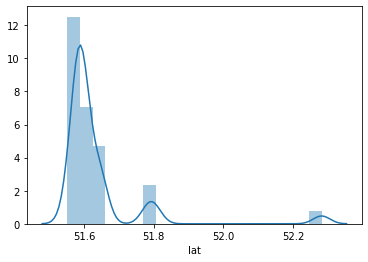

In [79]:
sns.distplot(train_data[(~train_data['osm_city_nearest_population'].isnull()) & \
            (train_data['city'] == 'Саратов') & \
          (train_data['osm_city_nearest_population'] == 221847)]['lat'])

<AxesSubplot:xlabel='lat'>

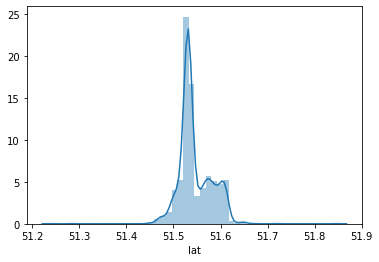

In [81]:
sns.distplot(train_data[(~train_data['osm_city_nearest_population'].isnull()) & \
            (train_data['city'] == 'Саратов') & \
          (train_data['osm_city_nearest_population'] == 842097)]['lat'])

<AxesSubplot:xlabel='lat'>

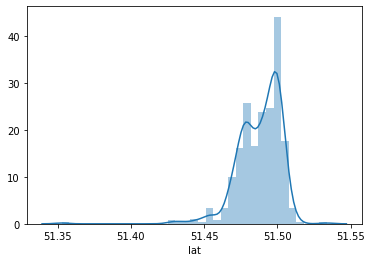

In [82]:
sns.distplot(train_data[(~train_data['osm_city_nearest_population'].isnull()) & \
            (train_data['city'] == 'Энгельс') & \
          (train_data['osm_city_nearest_population'] == 221847)]['lat'])

In [85]:
train_data['id'] = train_data['id'].apply(lambda x: int(x.replace('COL_', '')))

In [87]:
train_data['id_is_equal'] = np.where(train_data['id'] == train_data.index, 1, 0)

<AxesSubplot:xlabel='id_is_equal'>

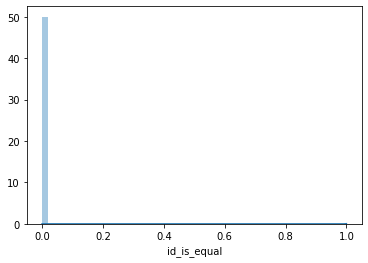

In [89]:
sns.distplot(train_data['id_is_equal'])

<AxesSubplot:xlabel='id_is_equal', ylabel='per_square_meter_price'>

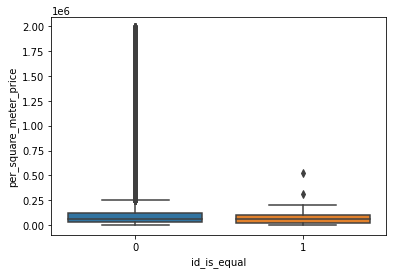

In [90]:
sns.boxplot(train_data['id_is_equal'], train_data['per_square_meter_price'])

In [92]:
def fill_na_grouped_data(data, col_to_fill, group_cols: list):
    grouped_data = data.groupby(group_cols)[col_to_fill].median()
    grouped_data.dropna(inplace=True)
    data.set_index(group_cols, inplace=True)
    data[col_to_fill].fillna(grouped_data, inplace=True)
    data.reset_index(inplace=True)
    return data

In [109]:
train_data.isnull().sum().sort_values(ascending=False)

floor                                  176237
reform_mean_floor_count_500             30168
reform_mean_year_building_500           29637
reform_house_population_500             27234
reform_mean_floor_count_1000            16708
reform_mean_year_building_1000          16239
reform_house_population_1000            14596
street                                   1606
osm_city_nearest_population                55
osm_offices_points_in_0.01                  0
osm_subway_closest_dist                     0
osm_shops_points_in_0.01                    0
osm_shops_points_in_0.0075                  0
osm_shops_points_in_0.005                   0
osm_shops_points_in_0.001                   0
lat                                         0
osm_offices_points_in_0.0075                0
osm_train_stop_points_in_0.005              0
osm_offices_points_in_0.005                 0
osm_offices_points_in_0.001                 0
osm_leisure_points_in_0.01                  0
osm_leisure_points_in_0.0075      

In [110]:
fill_na_grouped_data(train_data, 'reform_mean_floor_count_1000', ['lat', 'lng']).isnull().sum().sort_values(ascending=False)

floor                                  176237
reform_mean_floor_count_500             30168
reform_mean_year_building_500           29637
reform_house_population_500             27234
reform_mean_floor_count_1000            16708
reform_mean_year_building_1000          16239
reform_house_population_1000            14596
street                                   1606
osm_city_nearest_population                55
osm_offices_points_in_0.01                  0
osm_subway_closest_dist                     0
osm_shops_points_in_0.01                    0
osm_shops_points_in_0.0075                  0
osm_shops_points_in_0.005                   0
osm_shops_points_in_0.001                   0
lat                                         0
osm_offices_points_in_0.0075                0
osm_train_stop_points_in_0.005              0
osm_offices_points_in_0.005                 0
osm_offices_points_in_0.001                 0
osm_leisure_points_in_0.01                  0
osm_leisure_points_in_0.0075      

<AxesSubplot:xlabel='reform_house_population_500'>

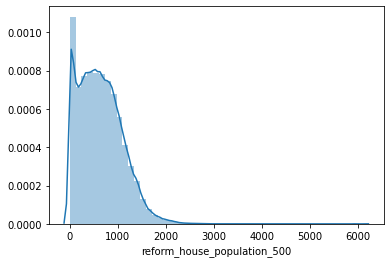

In [120]:
sns.distplot(train_data[~train_data['reform_house_population_500'].isnull()]['reform_house_population_500'])

<AxesSubplot:xlabel='reform_house_population_1000'>

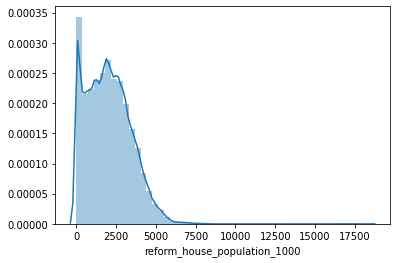

In [116]:
sns.distplot(train_data[~train_data['reform_house_population_1000'].isnull()]['reform_house_population_1000'])

In [138]:
train_data['year'] = pd.to_datetime(train_data['date']).dt.year
train_data['month'] = pd.to_datetime(train_data['date']).dt.month
train_data['day'] = pd.to_datetime(train_data['date']).dt.day

test_data['year'] = pd.to_datetime(test_data['date']).dt.year
test_data['month'] = pd.to_datetime(test_data['date']).dt.month
test_data['day'] = pd.to_datetime(test_data['date']).dt.day

In [297]:
train_data['day'].unique()

array([ 5, 12, 19, 26,  2,  9, 16, 23,  1,  8, 15, 22, 29,  3, 10, 17, 24,
       31,  7, 14, 21, 28], dtype=int64)

In [298]:
test_data['day'].unique()

array([ 6, 13, 20, 27,  4, 11, 18, 25,  1,  8, 15, 22, 29], dtype=int64)

In [146]:
train_data.groupby('month')['per_square_meter_price'].mean()

month
1    101190.597952
2     98949.883462
3    113026.177602
4    111044.597013
5    103817.573362
6    139218.953710
7    109846.080465
8    100976.477420
Name: per_square_meter_price, dtype: float64

<AxesSubplot:xlabel='day', ylabel='per_square_meter_price'>

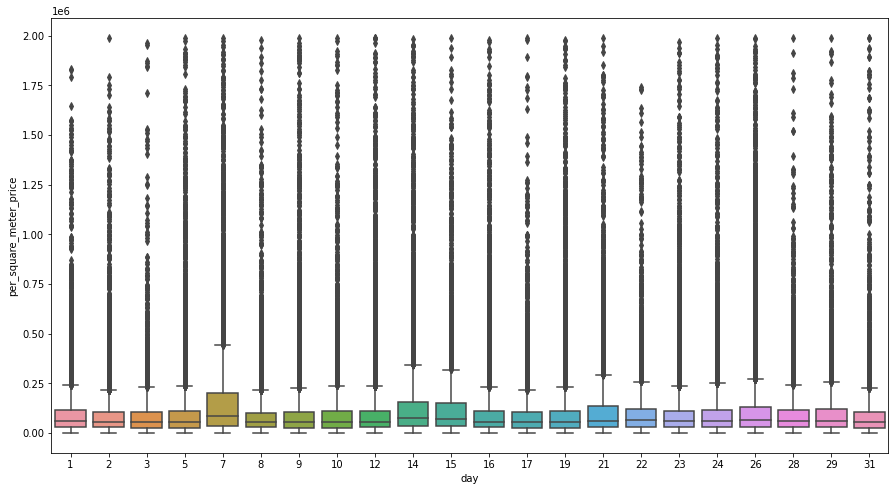

In [136]:
plt.figure(figsize=(15, 8))

sns.boxplot(train_data['day'], train_data['per_square_meter_price'])

<AxesSubplot:xlabel='region', ylabel='per_square_meter_price'>

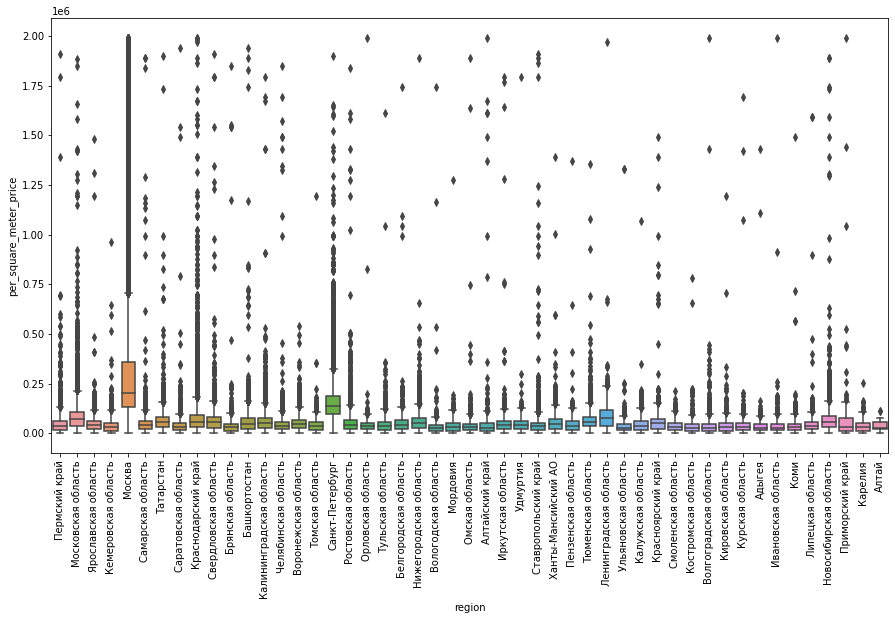

In [157]:
plt.figure(figsize=(15, 8))
plt.tick_params(axis='x', labelrotation=90)

sns.boxplot(train_data['region'], train_data['per_square_meter_price'], orient=45)

In [169]:
train_data['floor_isnull'] = np.where(train_data['floor'].isnull(), 0, 1)

<AxesSubplot:xlabel='floor_isnull', ylabel='per_square_meter_price'>

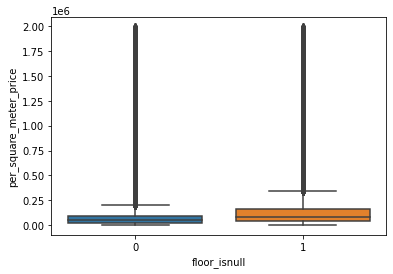

In [172]:
sns.boxplot(train_data['floor_isnull'], train_data['per_square_meter_price'])

In [190]:
def is_float(value):
    try:
        if type(float(value)) != 'float':
            return True
    except:
        return False

In [195]:
train_data['floor_is_float'] = np.where(train_data['floor'].apply(lambda x: is_float(x)), 1, 0)

In [293]:
train_data['floor'].unique()

array([nan, 3.0, 4.0, -1.0, 1.0, 14.0, 2.0, 8.0, -2.0, 6.0, 10.0, 5.0,
       16.0, 19.0, 7.0, 9.0, 58.0, 24.0, 18.0, 26.0, 17.0, 48.0, 11.0,
       -3.0, 15.0, 22.0, 60.0, 12.0, 21.0, 35.0, 28.0, 38.0, 39.0, 13.0,
       81.0, 44.0, 82.0, 25.0, 45.0, 47.0, 23.0, 37.0, 29.0, 113.0, 78.0,
       42.0, 69.0, 27.0, 46.0, 53.0, 80.0, 70.0, 76.0, 64.0, 30.0, 73.0,
       77.0, 52.0, 67.0, 65.0, 20.0, 40.0, 49.0, 75.0, 93.0, 94.0, 91.0,
       72.0, 79.0, 84.0, 92.0, 33.0, 66.0, 90.0, 31.0, 36.0, 61.0, 71.0,
       68.0, 51.0, 97.0, 43.0, 95.0, 85.0, 50.0, 0.0, 62.0, 54.0, 74.0,
       57.0, 41.0, 34.0, 59.0, 56.0, 123.0, 55.0, 83.0, '27.0', '1.0',
       '5.0', '-1.0', '67.0', '2.0', '0.0', '4.0', '6.0', '3.0', '15.0',
       '10.0', '11.0', '30.0', '12.0', '-2.0', '14.0', '36.0', '8.0',
       '50.0', '17.0', '19.0', '37.0', '68.0', '7.0', '42.0', '9.0',
       '16.0', '20.0', '53.0', '91.0', '84.0', '38.0', '21.0', '48.0',
       '22.0', '23.0', '1', '18.0', 'подвал, 1', '2', 'подвал',
  

In [202]:
train_data[train_data['floor_is_float'] != 0]['floor'].unique()

array([nan, 3.0, 4.0, -1.0, 1.0, 14.0, 2.0, 8.0, -2.0, 6.0, 10.0, 5.0,
       16.0, 19.0, 7.0, 9.0, 58.0, 24.0, 18.0, 26.0, 17.0, 48.0, 11.0,
       -3.0, 15.0, 22.0, 60.0, 12.0, 21.0, 35.0, 28.0, 38.0, 39.0, 13.0,
       81.0, 44.0, 82.0, 25.0, 45.0, 47.0, 23.0, 37.0, 29.0, 113.0, 78.0,
       42.0, 69.0, 27.0, 46.0, 53.0, 80.0, 70.0, 76.0, 64.0, 30.0, 73.0,
       77.0, 52.0, 67.0, 65.0, 20.0, 40.0, 49.0, 75.0, 93.0, 94.0, 91.0,
       72.0, 79.0, 84.0, 92.0, 33.0, 66.0, 90.0, 31.0, 36.0, 61.0, 71.0,
       68.0, 51.0, 97.0, 43.0, 95.0, 85.0, 50.0, 0.0, 62.0, 54.0, 74.0,
       57.0, 41.0, 34.0, 59.0, 56.0, 123.0, 55.0, 83.0, '27.0', '1.0',
       '5.0', '-1.0', '67.0', '2.0', '0.0', '4.0', '6.0', '3.0', '15.0',
       '10.0', '11.0', '30.0', '12.0', '-2.0', '14.0', '36.0', '8.0',
       '50.0', '17.0', '19.0', '37.0', '68.0', '7.0', '42.0', '9.0',
       '16.0', '20.0', '53.0', '91.0', '84.0', '38.0', '21.0', '48.0',
       '22.0', '23.0', '1', '18.0', '2', '4', '5', '3', '10', '6',

In [294]:
train_data['floor_is_float'].value_counts()

1    279588
0       204
Name: floor_is_float, dtype: int64

In [205]:
train_data['realty_type'].value_counts()

10     148222
110     74209
100     57361
Name: realty_type, dtype: int64

<AxesSubplot:xlabel='realty_type', ylabel='per_square_meter_price'>

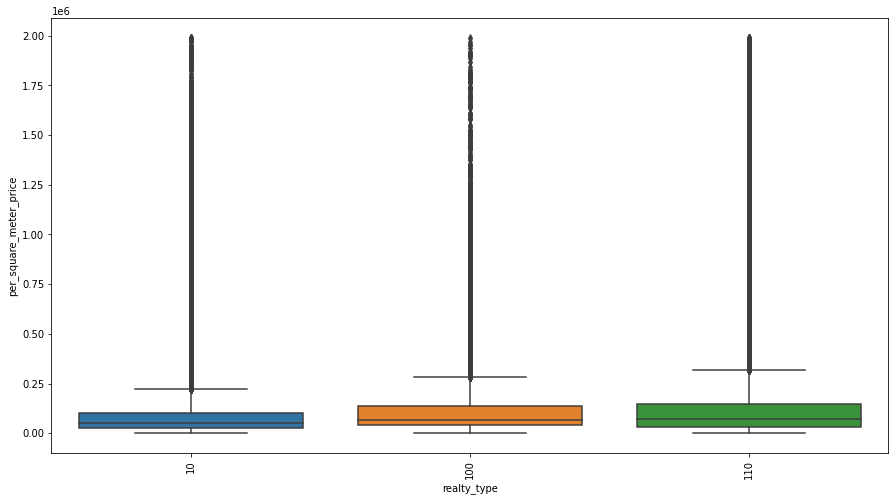

In [206]:
plt.figure(figsize=(15, 8))
plt.tick_params(axis='x', labelrotation=90)

sns.boxplot(train_data['realty_type'], train_data['per_square_meter_price'], orient=45)

In [208]:
train_data[train_data['city'] == 'Москва']['realty_type'].value_counts()

10     23469
110    16745
100    15782
Name: realty_type, dtype: int64

In [213]:
train_data[train_data['city'] == 'Екатеринбург']['realty_type'].value_counts()

100    3280
10     2876
110    2424
Name: realty_type, dtype: int64

<AxesSubplot:>

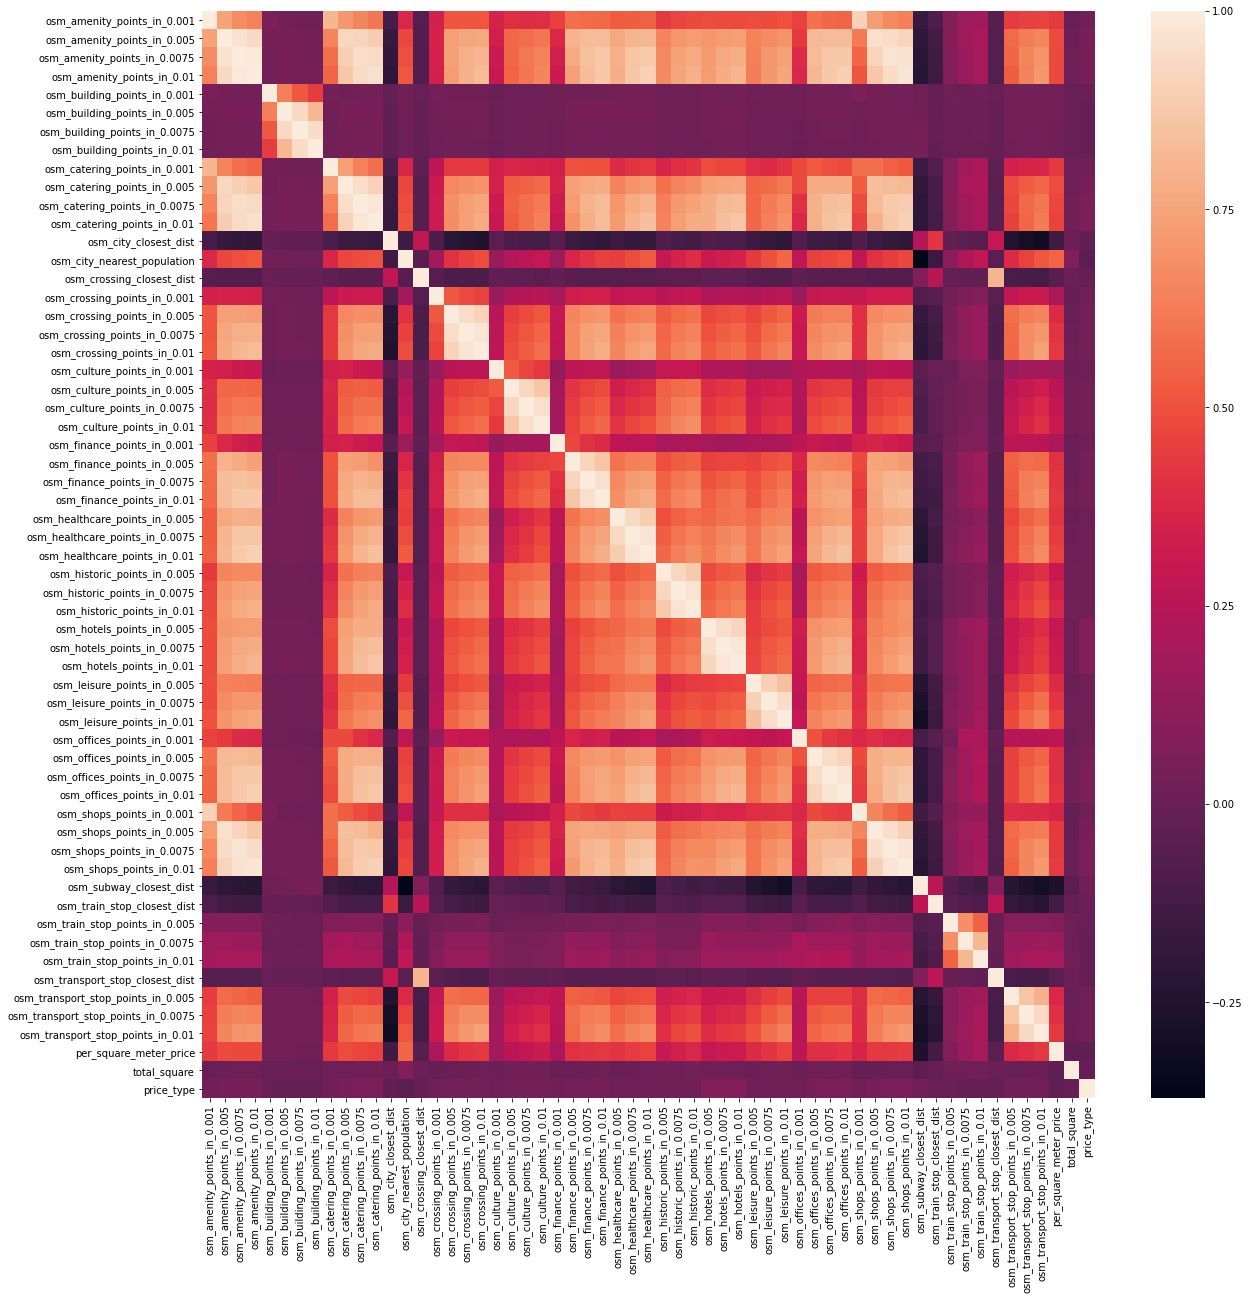

In [243]:
plt.figure(figsize=(20, 20))
plt.tick_params(axis='x', labelrotation=45)

sns.heatmap(train_data[[col for col in train_data.columns if 'osm' in col or 'price' in col or 'total_square' in col and train_data[col].dtype != 'O']].corr())

In [246]:
train_data[[col for col in train_data.columns if 'osm' in col or 'price' in col or 'total_square' in col and train_data[col].dtype != 'O']]

,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,total_square,price_type
0,4,19,35,52,0,0,0,0,0,2,4,6,3.293470,Пермь,1055397.0,0.027732,3,6,17,34,0,0,1,1,0,0,1,2,2,3,4,0,0,1,0,0,0,0,1,2,0,1,2,4,4,11,20,28,269.024986,3.368385,0,0,0,0.002864,4,13,21,139937.500000,32.000000,0
1,3,24,37,59,0,0,0,1,0,2,2,6,43.950989,Орехово-Зуево,120184.0,0.089441,0,31,50,57,0,1,2,3,0,0,1,2,1,1,3,2,4,6,2,2,2,1,1,2,0,1,2,3,1,12,20,29,102.455451,1.476600,0,0,0,0.154661,4,10,11,60410.714286,280.000000,0
2,1,30,67,128,0,0,1,1,0,3,6,11,2.676293,Ярославль,603961.0,0.200995,0,15,29,53,0,1,2,2,0,0,5,9,0,1,3,0,0,0,0,0,1,2,3,6,0,1,6,9,1,16,37,80,243.361937,1.455127,0,0,0,0.118275,9,13,21,45164.761264,297.400000,0
3,0,0,5,21,0,0,0,1,0,0,1,4,15.618563,Новокузнецк,552105.0,0.861400,0,0,0,5,0,0,0,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4,11,295.633502,9.400855,0,0,0,1.036523,0,0,3,28805.263158,190.000000,0
4,1,23,64,153,0,1,1,1,0,8,14,26,9.995325,Химки,232066.0,0.236744,0,14,40,78,0,0,0,0,0,0,3,9,2,7,14,0,2,2,1,1,3,3,4,9,0,8,8,12,0,8,33,89,1.110429,1.235503,0,0,0,0.235032,10,32,62,13222.591362,60.200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279787,2,33,111,222,0,0,1,1,1,9,24,45,3.614641,Томск,576624.0,0.116917,0,13,32,62,0,1,1,2,0,1,3,8,0,2,4,1,2,6,2,4,6,1,3,14,0,0,1,6,0,16,67,130,201.668316,0.897445,0,0,0,0.309002,5,20,37,54278.287605,358.320073,1
279788,10,274,718,1340,0,2,5,16,2,96,282,497,2.063594,Санкт-Петербург,5381736.0,0.110570,0,24,89,182,0,18,38,62,0,6,26,43,13,34,57,5,19,36,27,84,141,9,22,40,2,23,86,178,5,136,370,750,0.748926,1.188643,0,0,0,0.204208,7,38,73,595298.017731,119.637556,1
279789,0,12,34,84,0,2,2,2,0,2,6,22,2.126417,Калининград,453461.0,0.108723,1,14,27,55,0,0,1,1,0,0,0,3,0,1,2,5,5,5,0,2,5,0,1,3,0,3,5,9,0,5,20,43,814.733428,1.117929,0,0,0,0.092370,11,14,31,35758.847259,312.789725,1
279790,5,57,100,134,0,0,0,0,1,16,32,41,0.844577,Кемерово,558662.0,0.341931,0,10,12,20,1,3,5,7,1,4,6,7,1,3,3,1,7,9,0,0,1,1,4,7,0,2,9,12,1,23,32,48,200.109079,2.073608,0,0,0,0.385545,3,14,18,38755.038322,89.201305,1


In [284]:
(train_data.groupby('region')['osm_offices_points_in_0.01'].sum() / train_data['osm_offices_points_in_0.01'].sum() * 100).reset_index()

,region,osm_offices_points_in_0.01
0,Адыгея,0.072726
1,Алтай,0.001154
2,Алтайский край,0.336276
3,Башкортостан,1.200458
4,Белгородская область,0.287827
5,Брянская область,0.123834
6,Волгоградская область,0.627462
7,Вологодская область,0.165252
8,Воронежская область,2.752548
9,Ивановская область,0.129956


<AxesSubplot:xlabel='osm_offices_points_in_0.001'>

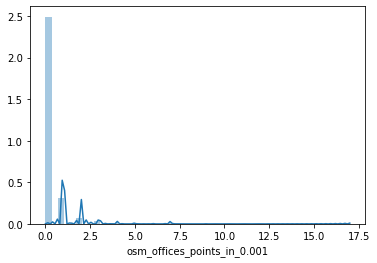

In [257]:
sns.distplot(train_data['osm_offices_points_in_0.001'])

In [312]:
train_data['osm_offices_points_in_0.001'].value_counts(normalize=True)

0     0.847522
1     0.107855
2     0.025851
3     0.009986
7     0.003810
4     0.003185
5     0.001219
6     0.000336
9     0.000107
8     0.000093
11    0.000018
12    0.000011
17    0.000007
Name: osm_offices_points_in_0.001, dtype: float64

In [235]:
plt.figure(figsize=(20,20)) 

sns.pairplot(train_data[[col for col in train_data.columns if 'osm' in col and 'price' in col and 'total_square' in col and train_data[col].dtype != 'O']])

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1440x1440 with 0 Axes>

<Figure size 0x0 with 0 Axes>

<AxesSubplot:xlabel='osm_transport_stop_closest_dist'>

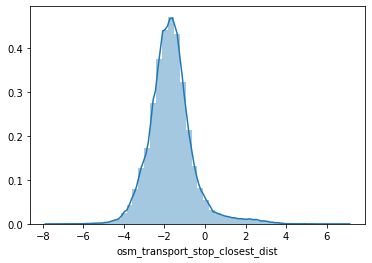

In [309]:
sns.distplot(np.log(train_data['osm_transport_stop_closest_dist']))

<AxesSubplot:xlabel='osm_transport_stop_closest_dist'>

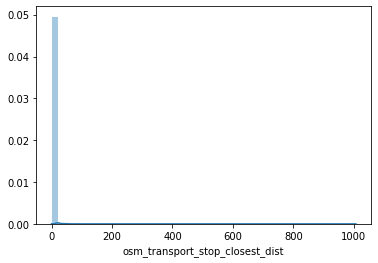

In [310]:
sns.distplot(train_data['osm_transport_stop_closest_dist'])

In [291]:
train_data[train_data['total_square'] == train_data['total_square'].max()]

,lat,lng,city,floor,id,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,osm_building_points_in_0.01,osm_catering_points_in_0.001,osm_catering_points_in_0.005,osm_catering_points_in_0.0075,osm_catering_points_in_0.01,osm_city_closest_dist,osm_city_nearest_name,osm_city_nearest_population,osm_crossing_closest_dist,osm_crossing_points_in_0.001,osm_crossing_points_in_0.005,osm_crossing_points_in_0.0075,osm_crossing_points_in_0.01,osm_culture_points_in_0.001,osm_culture_points_in_0.005,osm_culture_points_in_0.0075,osm_culture_points_in_0.01,osm_finance_points_in_0.001,osm_finance_points_in_0.005,osm_finance_points_in_0.0075,osm_finance_points_in_0.01,osm_healthcare_points_in_0.005,osm_healthcare_points_in_0.0075,osm_healthcare_points_in_0.01,osm_historic_points_in_0.005,osm_historic_points_in_0.0075,osm_historic_points_in_0.01,osm_hotels_points_in_0.005,osm_hotels_points_in_0.0075,osm_hotels_points_in_0.01,osm_leisure_points_in_0.005,osm_leisure_points_in_0.0075,osm_leisure_points_in_0.01,osm_offices_points_in_0.001,osm_offices_points_in_0.005,osm_offices_points_in_0.0075,osm_offices_points_in_0.01,osm_shops_points_in_0.001,osm_shops_points_in_0.005,osm_shops_points_in_0.0075,osm_shops_points_in_0.01,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_train_stop_points_in_0.005,osm_train_stop_points_in_0.0075,osm_train_stop_points_in_0.01,osm_transport_stop_closest_dist,osm_transport_stop_points_in_0.005,osm_transport_stop_points_in_0.0075,osm_transport_stop_points_in_0.01,per_square_meter_price,reform_count_of_houses_1000,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,id_is_equal,year,month,day,floor_isnull,floor_is_float
90643,55.676987,37.509620,Москва,1.0,92732,4,48,85,130,0,0,1,1,0,10,15,24,10.604271,Москва,12630289.0,0.125067,0,12,23,41,0,0,0,0,1,3,8,9,7,10,15,2,5,5,0,0,0,1,5,10,0,4,7,10,2,26,42,65,0.218064,3.530707,0,0,0,0.107941,19,29,36,149250.000,110,22,3134.0,658.0,12.330275,12.190476,1978.678899,1977.857143,Москва,40000.0,S32088,2020-03-15,110,0,0,2020,3,15,1,1
112453,55.529870,60.578266,Кыштым,NaN,115047,0,2,2,3,0,0,1,1,0,0,0,0,59.629422,Миасс,151275.0,11.573687,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,2,2,137.587157,21.980359,0,0,0,4.922640,0,0,0,820.875,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Челябинская область,40000.0,S28070,2020-04-05,10,0,0,2020,4,5,0,1
116541,54.535908,82.584280,Верх-Ирмень,NaN,119210,0,0,1,1,0,0,0,0,0,0,0,0,41.724154,Бердск,104237.0,14.075157,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,53.540457,51.563526,0,0,0,14.270730,0,0,0,870.625,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Новосибирская область,40000.0,S18045,2020-04-12,10,0,0,2020,4,12,0,1
126179,56.730300,61.384624,Белоярский,NaN,129084,0,0,0,0,0,0,0,0,0,0,0,0,47.892753,Каменск-Уральский,168997.0,2.988505,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.675161,0.815353,0,0,0,2.952204,0,0,0,2238.750,2,1,4.0,0.0,1.000000,NaN,1981.000000,NaN,Свердловская область,40000.0,S12091,2020-04-19,10,0,0,2020,4,19,0,1
133779,48.794586,44.753430,Волжский,NaN,136847,1,28,77,152,0,5,11,15,0,3,7,20,2.272900,Волжский,326055.0,0.296619,0,17,35,53,0,1,2,5,0,2,5,14,3,12,15,2,2,4,0,0,0,0,0,1,2,13,19,35,0,15,44,93,534.164823,4.657341,0,0,0,0.251917,3,10,20,995.000,218,46,3282.0,609.0,4.444954,4.456522,1963.279817,1964.500000,Волгоградская область,40000.0,S30353,2020-04-26,10,0,0,2020,4,26,0,1
142968,55.428078,37.552120,Подольск,2.0,146241,2,62,150,234,0,0,2,3,0,5,15,25,0.531406,Подольск,223896.0,0.106430,0,28,65,89,2,3,4,6,0,4,13,16,1,6,8,2,15,30,0,1,1,3,9,14,0,3,8,12,0,42,84,130,12.446537,0.930998,0,0,0,0.083602,10,20,36,29850.000,109,22,2176.0,512.0,6.296296,6.954545,1960